# Capstone Part 4.2 - Data Preprocessing / Logistic regression Modelling class weight= 35 / 65

In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [142]:
combhotel_clean_df = pd.read_csv('combhotel_clean_df_v2.csv')

In [143]:
combhotel_clean_df.sample(3)

,hotel,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,IsCanceled,ADR_bin,got_assigned_room
26637,resort hotel,0,2017,January,4,27,0,1,2,0,...,Transient,73.0,0,0,Check-Out,2017-01-28,2017-01-27,False,51-100,True
81577,city hotel,0,2017,May,22,29,1,2,2,0,...,Transient,153.0,0,2,Check-Out,2017-06-01,2017-05-29,False,151-200,True
15983,resort hotel,6,2016,February,6,5,2,2,2,0,...,Transient,45.0,0,0,Check-Out,2016-02-09,2016-02-05,False,0-50,False


In [144]:
combhotel_clean_df.columns

Index(['hotel', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'ArrivalDate', 'IsCanceled', 'ADR_bin', 'got_assigned_room'],
      dtype='object')

In [145]:
numerical_columns = ['LeadTime', 'StaysInWeekendNights','StaysInWeekNights','Adults','Children',
                   'Babies','PreviousCancellations','PreviousBookingsNotCanceled', 'BookingChanges',
                   'DaysInWaitingList','ADR','RequiredCarParkingSpaces','TotalOfSpecialRequests']

binary_columns = ['IsCanceled', 'IsRepeatedGuest', 'got_assigned_room']

categorical_columns = ['hotel','Meal', 'Country', 'MarketSegment', 'DistributionChannel',
                       'ReservedRoomType', 'AssignedRoomType','DepositType', 'Agent', 'Company',
                       'CustomerType','ReservationStatus', 'ADR_bin']

date_not_datetime_columns = ['ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth']

datetime_columns = ['ReservationStatusDate','ArrivalDate']

# Preprocessing

Selecting feature columns

In [146]:
feature_cols = ['hotel','ADR', 'LeadTime', 'ArrivalDateMonth','StaysInWeekendNights', 'StaysInWeekNights','MarketSegment',
                'DistributionChannel','IsRepeatedGuest','CustomerType','got_assigned_room','DepositType']

cat_cols = ['hotel', 'ArrivalDateMonth','MarketSegment','DistributionChannel','CustomerType','DepositType']

binary_cols =  ['IsRepeatedGuest','got_assigned_room']

num_cols = ['LeadTime','StaysInWeekendNights','StaysInWeekNights', 'ADR']

In [147]:
combhotel_preprocess_df = combhotel_clean_df[feature_cols]

**one-hot encode**

In [148]:
for col in cat_cols:
    combhotel_preprocess_df = pd.concat([combhotel_preprocess_df,pd.get_dummies(combhotel_preprocess_df[col], prefix= col, drop_first= True)],axis = 1)

Dropping original category columns

In [149]:
combhotel_preprocess_df = combhotel_preprocess_df.drop(cat_cols,axis = 1)

In [150]:
combhotel_preprocess_df.columns

Index(['ADR', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
       'IsRepeatedGuest', 'got_assigned_room', 'hotel_resort hotel',
       'ArrivalDateMonth_August', 'ArrivalDateMonth_December',
       'ArrivalDateMonth_February', 'ArrivalDateMonth_January',
       'ArrivalDateMonth_July', 'ArrivalDateMonth_June',
       'ArrivalDateMonth_March', 'ArrivalDateMonth_May',
       'ArrivalDateMonth_November', 'ArrivalDateMonth_October',
       'ArrivalDateMonth_September', 'MarketSegment_Complementary',
       'MarketSegment_Corporate', 'MarketSegment_Direct',
       'MarketSegment_Groups', 'MarketSegment_Offline TA/TO',
       'MarketSegment_Online TA', 'DistributionChannel_Direct',
       'DistributionChannel_GDS', 'DistributionChannel_TA/TO',
       'CustomerType_Group', 'CustomerType_Transient',
       'CustomerType_Transient-Party', 'DepositType_Non Refund     ',
       'DepositType_Refundable     '],
      dtype='object')

## train_test_split


In [151]:
X = combhotel_preprocess_df
y = combhotel_clean_df['IsCanceled']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling Features

In [153]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

## Training a model using Logistic Regression

In [155]:
log = LogisticRegression(solver='liblinear',random_state=42, class_weight={0:0.35,1:0.65})
log.fit(X_train_scaled, y_train)
y_pred_log = log.predict(X_test_scaled)

## Checking how many iterations performed

In [156]:
print (log.n_iter_)

[6]


## Evaluation of Model

In [157]:
print(f'accuracy score: {metrics.accuracy_score(y_test,y_pred_log)}')
print(f'recall score: {metrics.recall_score(y_test,y_pred_log)}')
print(f'precision score: {metrics.precision_score(y_test,y_pred_log)}')
print(f'f1 score: {metrics.f1_score(y_test,y_pred_log)}')

accuracy score: 0.7172187715665976
recall score: 0.6048472075869337
precision score: 0.4854533152909337
f1 score: 0.5386131181383128


## Confusion matrix

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [159]:
cm = confusion_matrix(y_test, y_pred_log)

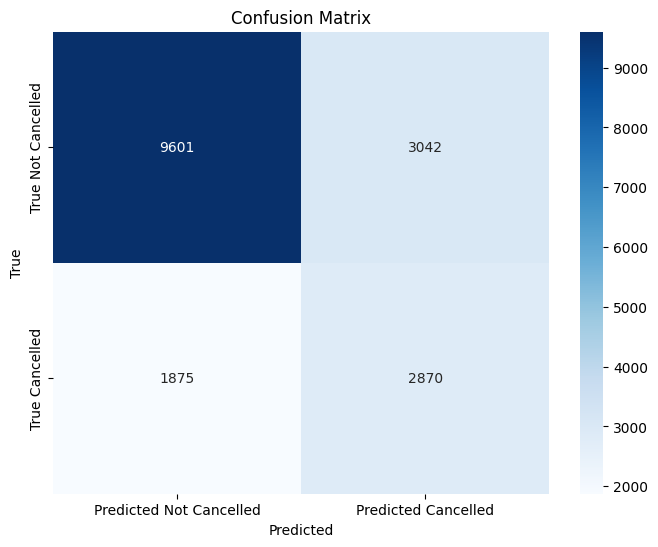

In [160]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Not Cancelled', 'Predicted Cancelled'], yticklabels=['True Not Cancelled', 'True Cancelled'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()